# Which is the best neighborhood to walk in?
## By Walkin (Brian Donaghey, Christian Estey, Yu Wang)

![walk](https://media.giphy.com/media/7zUBiR8B4bKTK/giphy.gif)

## Introduction

Walking is an essential mode of transportation for many Pittsburgh residents, including students and those looking for a healthier, more environmentally friendly way to navigate the city. However, choosing the best neighborhood for walking can be challenging, as it depends on various factors such as traffic, pedestrian infrastructure, and safety. In this project, we aim to identify the most walkable neighborhood in Pittsburgh, offering an ideal environment for those who prefer to explore the city on foot. 

### The Metric: Pedestrian Safety and Accessibility

This metric contains three submetrics to determine the overall pedestrian safety and accessibility.
1. Crosswalks in Pittsburgh by Neighborhood
2. Traffic Count in Pittsburgh by Neighborhood
3. Crime Incidents in Pittsburgh by Neighborhood

Datasets we used:
1. [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

    This dataset provides data on traffic counts using various methods by neighborhood.
    
2. [City of Pittsburgh Intersection Markings](https://data.wprdc.org/dataset/city-of-pittsburgh-markings)

    This dataset provides information on crosswalks in certain Pittsburgh neighborhoods
    
3. [Police Incident Blotter (30 Day)](https://data.wprdc.org/dataset/police-incident-blotter)

    This dataset contains recent crime incident data for the City of Pittsburgh, updated nightly at block/intersection levels.

### Submetric #1: City of Pittsburgh Intersection Markings
#### Data Analyzed by Brian Donaghey
[Dataset](https://data.wprdc.org/dataset/city-of-pittsburgh-markings/resource/632fbb91-c55d-4221-a8ad-91c72902bc61)

 Our Question: What neighborhood has the most crosswalks so that pedestrians can safely cross the road?

In [33]:
#imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

In [35]:
#reading the data
data = pd.read_csv("data.csv")
data.head()

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267


In [36]:
data.groupby("neighborhood").count()
#tells us how many neighborhoods our data has (88)

,id,type,street,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,
Allegheny Center,41,41,40,41,41,41,41,41,41,41,41,41,41
Allegheny West,26,26,25,26,26,26,26,26,26,26,26,26,26
Allentown,24,24,24,24,24,24,24,24,24,24,24,24,24
Arlington,13,13,13,13,13,13,13,13,13,13,13,13,13
Banksville,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,34,34,34,34,34,34,34,34,34,34,34,34,34
West End,24,24,22,24,24,24,24,24,24,24,24,24,24
West Oakland,41,41,40,41,41,41,41,41,41,41,41,41,41


In [37]:
#removing insignificant neighborhoods (<20 crosswalks)
def filter (x, fifty):
    if len(x) > fifty:
        return True
    else:
        return False
crosswalks = data.groupby('neighborhood').filter(filter,fifty =50)
crosswalks.groupby('neighborhood').count()


,id,type,street,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,
Beechview,69,69,69,69,69,69,69,69,69,69,69,69,69
Bloomfield,192,192,192,192,192,192,192,192,192,192,192,192,192
Bluff,82,82,75,82,82,82,82,82,82,82,82,82,82
Brighton Heights,62,62,62,62,62,62,62,62,62,62,62,62,62
Brookline,86,86,86,86,86,86,86,86,86,86,86,86,86
Carrick,73,73,72,73,71,73,73,73,73,73,73,73,73
Central Business District,402,402,396,402,402,402,402,402,402,402,402,402,402
Central Lawrenceville,81,81,77,81,81,81,81,81,81,81,81,81,81
Central Oakland,113,113,113,113,113,113,113,113,113,113,113,113,113


In [38]:
crosswalksfinal = crosswalks.groupby("neighborhood").size().sort_values(ascending=False)
crosswalksfinal.head(20)

neighborhood
Central Business District    402
South Side Flats             262
Squirrel Hill South          239
Bloomfield                   192
Shadyside                    190
East Liberty                 146
North Oakland                125
Strip District               114
Central Oakland              113
Squirrel Hill North          112
Mount Washington              95
Point Breeze                  91
Brookline                     86
Bluff                         82
Central Lawrenceville         81
Homewood South                81
North Shore                   75
Carrick                       73
Beechview                     69
Hazelwood                     68
dtype: int64

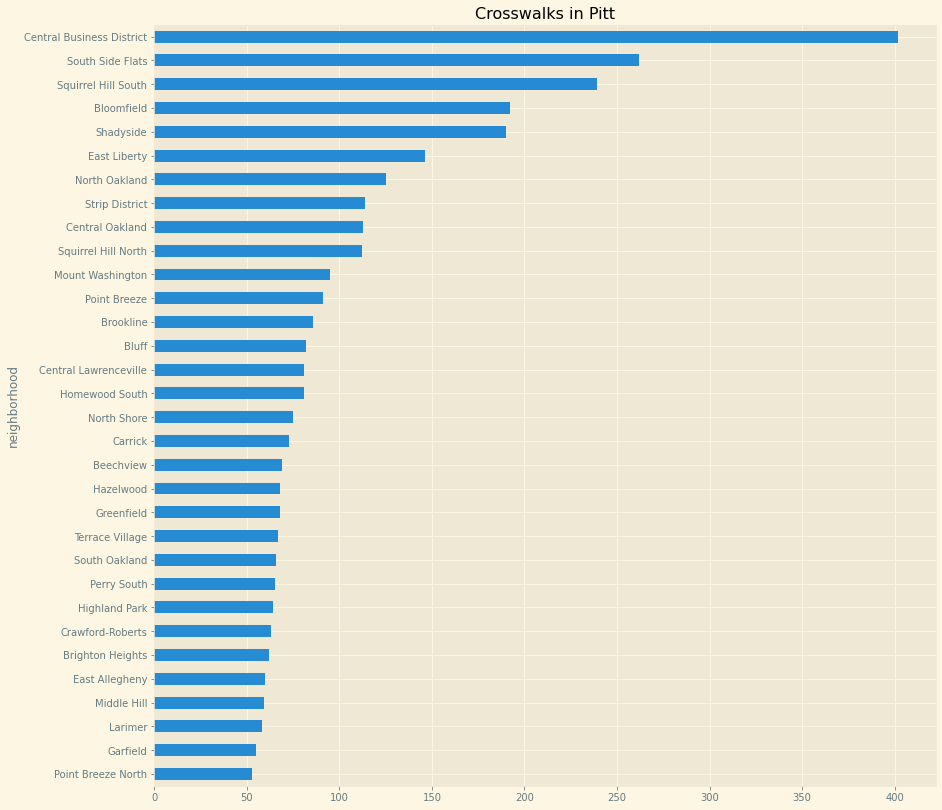

In [39]:
#bar chart
plt.style.use('Solarize_Light2')
crosswalksfinal.plot.barh(title = 'Crosswalks in Pitt', x= 'Neighborhood', y='Number of Crosswalks', figsize=(14,14)).invert_yaxis()


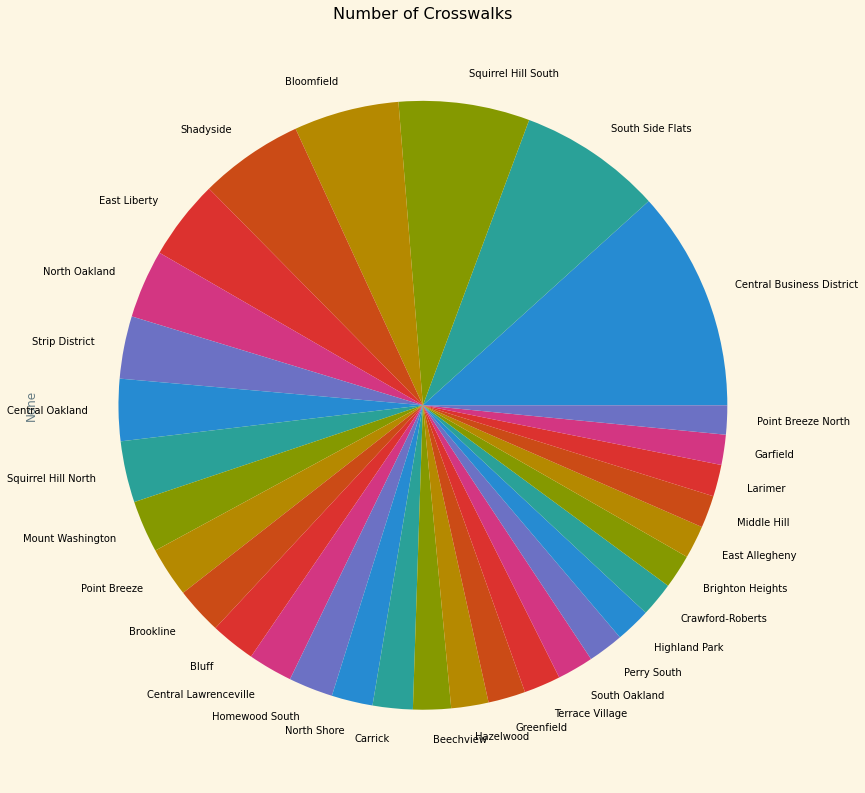

In [40]:
#pie chart
plt.style.use('Solarize_Light2')
crosswalksfinal.plot.pie(figsize = (14,14), title = "Number of Crosswalks")

### Submetric #2: Traffic Volume in each Neighborhood
#### Data Analyzed by Yu Wang
Dataset: [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

**First, we load the shapefile containing the neighborhood data for Pittsburgh.**

In [41]:
import geopandas as gpd
import pandas as pd

# Load the shapefile using geopandas
neighborhoods = gpd.read_file('TrafficCountYuw/code/data/pittsburghpaneighborhoods-/Neighborhoods_.shp')

neighborhoods.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


**Load in the City of Pittsburgh Traffic Count dataset...** 

In [42]:
import pandas as pd
traffic_data = pd.read_csv('TrafficCountYuw/code/data/traffic-count.csv')
traffic_data.head(3)

# Show the first three items as a preview

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16


There are three columns we should pick out and use: neighborhood, average_daily_car_traffic, and geographical location(longtitude and latitude).

For this metric and overall data analysis, we only count the car traffic(excludes the bike traffic), then determine if the traffic condition is good enough to walk in.
We collect the total traffic count for each neighborhood in the time period given by the dataset, and get the average traffic count by neighborhood.

The data is sorted in an ascending order, and the first 3 items are shown: 3 neighborhoods with fewest average traffic counts.

In [43]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load the traffic-count dataset and neighborhoods shapefile
traffic_data = pd.read_csv('TrafficCountYuw/code/data/traffic-count.csv')
neighborhoods = gpd.read_file('TrafficCountYuw/code/data/pittsburghpaneighborhoods-/Neighborhoods_.shp')
traffic_data = traffic_data[['neighborhood', 'average_daily_car_traffic', 'longitude', 'latitude']].dropna()
traffic_data['geometry'] = traffic_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
traffic_data = gpd.GeoDataFrame(traffic_data, geometry='geometry', crs=neighborhoods.crs)

def find_neighborhood(point, neighborhoods):
    for index, row in neighborhoods.iterrows():
        if row['geometry'].contains(point):
            return row['hood']
    return None

traffic_data['neighborhood'] = traffic_data['geometry'].apply(lambda point: find_neighborhood(point, neighborhoods))
traffic_data.dropna(subset=['neighborhood'], inplace=True)

# Collect the traffic counts by neighborhood names and calculate the average value
average_traffic_by_neighborhood = traffic_data.groupby('neighborhood').agg({'average_daily_car_traffic': 'mean'})
average_traffic_by_neighborhood.reset_index(inplace=True)
average_traffic_by_neighborhood.columns = ['Neighborhood', 'Average Traffic Count']

# Combine the geometry of neighborhoods and traffic data
result = neighborhoods.merge(average_traffic_by_neighborhood, left_on='hood', right_on='Neighborhood')

# The column for the display
result = result[['Neighborhood', 'geometry', 'Average Traffic Count']]

# Show the manipulated dataset
result.head(3)

,Neighborhood,geometry,Average Traffic Count
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",4964.000000
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",3939.111111
2,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",3823.000000


**_The last step for this data process: Sort the data in an ascending order to show neighborhoods with relatively few traffic counts_**

In [44]:
# Show sorted values - in an ascneding order
result_sorted = result.sort_values(by='Average Traffic Count', ascending=True)
result_sorted.head(10)

,Neighborhood,geometry,Average Traffic Count
62,South Side Flats,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",115.000000
9,Lincoln Place,"POLYGON ((-79.91042 40.37842, -79.91038 40.378...",126.000000
14,Lincoln-Lemington-Belmar,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",195.000000
63,Fineview,"POLYGON ((-80.00198 40.46814, -80.00129 40.467...",419.000000
20,Allegheny West,"POLYGON ((-80.00895 40.44996, -80.00894 40.449...",477.000000
25,New Homestead,"POLYGON ((-79.91621 40.39849, -79.91621 40.398...",666.000000
28,Overbrook,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",777.000000
53,Summer Hill,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",937.000000
45,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",953.333333
26,Central Northside,"POLYGON ((-80.00228 40.45868, -80.00228 40.458...",1189.000000


For the table above, we combine the data both in the neighborhood shapefile and traffic count in terms of location/geometry. 
It seems that the location(longtitude and latitude) can match the geometry. We tried, and it works!
We also remove the items fail to match the geometry.


In this way, we can use geopandas to load and visualize data.

Again, the average traffic count is derived from - **total traffic counts for a neighborhood in a time frame / days counted** - that's the average traffic count for a neighborhood.

From the table above, we can see that the neighborhood South Side Flats has the fewest traffic counts.

 #### Then, let's plot the top 30 neighborhoods with the fewer traffic counts compared to other ones.

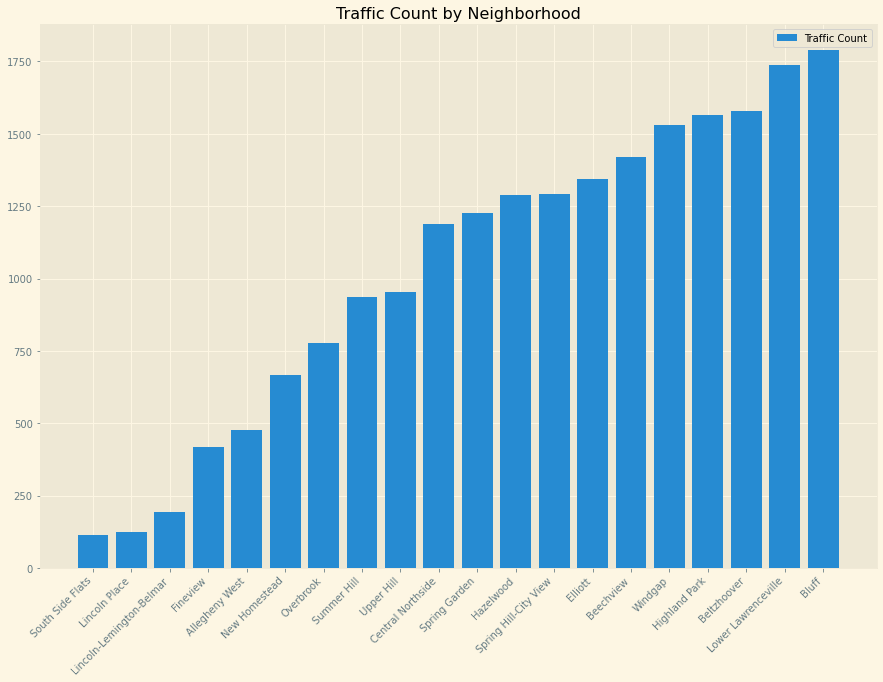

In [45]:
import matplotlib.pyplot as plt

top30 = result_sorted.head(20)

fig, axis = plt.subplots(figsize=(15,10))
bars = axis.bar(top30['Neighborhood'], top30['Average Traffic Count'])
axis.set_title("Traffic Count by Neighborhood")

axis.legend([bars[0]], ['Traffic Count'])
axis.set_xticklabels(top30['Neighborhood'], rotation=45, ha='right')
plt.show()


 #### Let's also plot the bottom 30 neighborhoods.

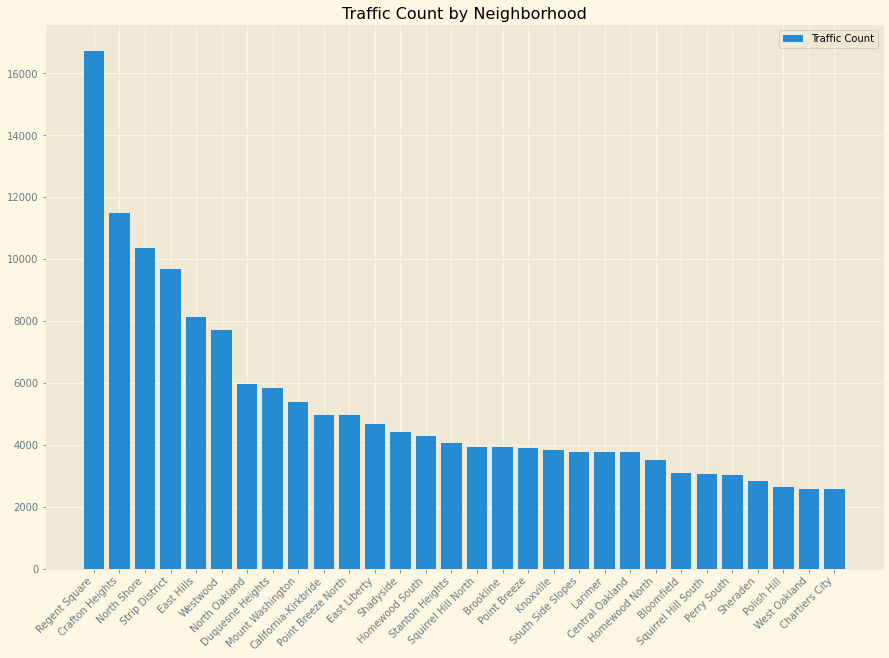

In [46]:
import matplotlib.pyplot as plt
descending_result = result_sorted.sort_values(by='Average Traffic Count', ascending=False)
bottom30 = descending_result.head(30)
fig, axis = plt.subplots(figsize=(15, 10))
bars = axis.bar(bottom30['Neighborhood'], bottom30['Average Traffic Count'])
axis.set_title("Traffic Count by Neighborhood")

axis.legend([bars[0]], ['Traffic Count'])
axis.set_xticklabels(bottom30['Neighborhood'], rotation=45, ha='right')
plt.show()


#### Since we merge the location data in traffic count dataset into the geometry in neighborhood shapefile, we can visualize the data as a colored map with the GeodataFrame.

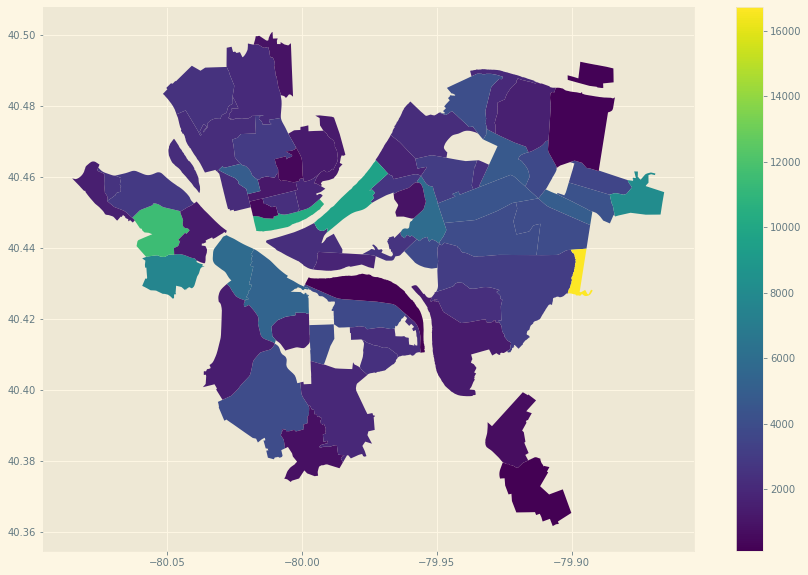

In [20]:
plt = result.plot(column="Average Traffic Count", legend=True, figsize=(15, 10))

### Submetric 3: Crimes in Pittsburgh by Neighborhood
#### Data analyzed by Christian Estey
Dataset: [Police Incident Blotter (30 Day)](https://data.wprdc.org/dataset/police-incident-blotter)

In [47]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import random

In [48]:
crimes = pd.read_csv("crimes.csv", index_col = None)
crimes.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,309158680,23053615,6,2023-04-12T07:00:00,"500 Block Smithfield St Pittsburgh, PA 15222",N,Central Business District,2,THEFT FROM AUTO,3934 Theft from Vehicle,201.0,6.0,6.0,-79.998119,40.440340
1,309165466,23053643,0,2023-04-12T09:00:00,"N Fairmount St & Rosetta St Pittsburgh, PA 15206",N,Garfield,5,99,9999 9999 - (Misc. Incident):,1114.0,9.0,2.0,-79.931355,40.466338
2,309165930,23053633,6,2023-04-11T23:00:00,"2100 Block Merriman Way Pittsburgh, PA 15203",N,South Side Flats,3,THEFT FROM AUTO,3934 Theft from Vehicle / 4106 Access Device F...,1609.0,3.0,3.0,-79.975876,40.430655
3,309168723,23053667,6,2023-04-12T01:05:00,"400 Block Orchard Pl Pittsburgh, PA 15210",N,Knoxville,3,THEFT,3921 Theft by Unlawful Taking or Disposition. ...,3001.0,3.0,5.0,-79.995428,40.417685
4,309168868,23053660,5,2023-04-12T07:30:00,"1400 Block Beldale St Pittsburgh, PA 15233",N,Manchester,1,BURGLARY,3502 Burglary.,2107.0,6.0,1.0,-80.028001,40.459059
5,309170098,23053666,10,2023-04-12T09:27:00,"100 Block Blvd Of The Allies Pittsburgh, PA 15222",N,Central Business District,2,TERRORISTIC THREATS,2706 Terroristic Threats.,201.0,6.0,6.0,-80.004963,40.439341
6,309170460,23053692,0,2023-04-12T10:07:00,"300 Block S Main St Pittsburgh, PA 15220",N,West End,6,99,9993 PFA Service with Weapons Supplement,2019.0,7.0,2.0,-79.957948,40.467383
7,307522371,23042007,0,2023-03-22T11:21:00,"Beacon St & Hobart Rd Pittsburgh, PA 15217",Y,Squirrel Hill South,4,99,3323 Stop Signs and Yield Signs. / 1543 Drivin...,1413.0,5.0,3.0,-79.934949,40.432133
8,307558931,23042205,10,2023-03-22T15:20:00,"900 Block Proctor Way Pittsburgh, PA 15210",N,Allentown,3,SIMPLE ASSAULT,2701 Simple Assault.,1803.0,3.0,5.0,-79.991222,40.420461
9,307570370,23042137,0,2023-03-22T15:30:00,"1200 Block Elwell St Pittsburgh, PA 15207",N,Lincoln Place,4,99,9999 9999 - (Misc. Incident):,3102.0,5.0,3.0,-79.915564,40.369533


In [23]:
crimes["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    417
South Side Flats             140
Carrick                      101
East Liberty                  82
Bluff                         79
                            ... 
Ridgemont                      2
Regent Square                  2
Outside County                 1
Swisshelm Park                 1
New Homestead                  1
Name: INCIDENTNEIGHBORHOOD, Length: 92, dtype: int64

In [24]:
crimes.groupby("INCIDENTNEIGHBORHOOD").count()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,20,20,20,20,20,20,20,20,20,20,15,15,15,15
Allegheny West,5,5,5,5,5,5,5,5,5,5,3,3,3,3
Allentown,43,43,43,43,43,43,43,43,43,43,39,39,39,39
Arlington,25,25,25,25,25,25,25,25,25,25,24,24,25,25
Arlington Heights,3,3,3,3,3,3,3,3,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,13,13,13,13,13,13,13,13,13,13,11,11,11,11
West End,15,15,15,15,15,15,15,15,15,15,14,14,14,14
West Oakland,8,8,8,8,8,8,8,8,8,8,7,7,7,7


In [25]:
crimes.groupby(["INCIDENTNEIGHBORHOOD"]).size().sort_values(ascending=True)

INCIDENTNEIGHBORHOOD
New Homestead                  1
Outside County                 1
Swisshelm Park                 1
Regent Square                  2
Ridgemont                      2
                            ... 
Bluff                         79
East Liberty                  82
Carrick                      101
South Side Flats             140
Central Business District    417
Length: 92, dtype: int64

In [26]:
def filter (x, twenty):
    if len(x) < twenty:
        return True
    else:
        return False
crimesfinal = crimes.groupby('INCIDENTNEIGHBORHOOD').filter(filter,twenty =20)
crimesfinal.groupby('INCIDENTNEIGHBORHOOD').count()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny West,5,5,5,5,5,5,5,5,5,5,3,3,3,3
Arlington Heights,3,3,3,3,3,3,3,3,3,3,0,0,0,0
Bon Air,12,12,12,12,12,12,12,12,12,12,8,8,8,8
Chartiers City,3,3,3,3,3,3,3,3,3,3,2,2,2,2
Duquesne Heights,15,15,15,15,15,15,15,15,15,15,9,9,9,9
Esplen,8,8,8,8,8,8,8,8,8,8,7,7,7,7
Fairywood,17,17,17,17,17,17,17,17,17,17,11,11,12,12
Fineview,11,11,11,11,11,11,11,11,11,11,9,9,9,9
Friendship,7,7,7,7,7,7,7,7,7,7,6,6,6,6


In [27]:
crimesfinal = crimes.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending=False)
crimesfinal.head(20)

INCIDENTNEIGHBORHOOD
Central Business District    417
South Side Flats             140
Carrick                      101
East Liberty                  82
Bluff                         79
Brookline                     75
Mount Washington              73
Crawford-Roberts              71
Shadyside                     67
Marshall-Shadeland            63
Homewood North                63
Sheraden                      61
Brighton Heights              60
Squirrel Hill South           60
Lincoln-Lemington-Belmar      59
Beechview                     58
Hazelwood                     58
Knoxville                     57
Perry South                   56
Homewood South                53
dtype: int64

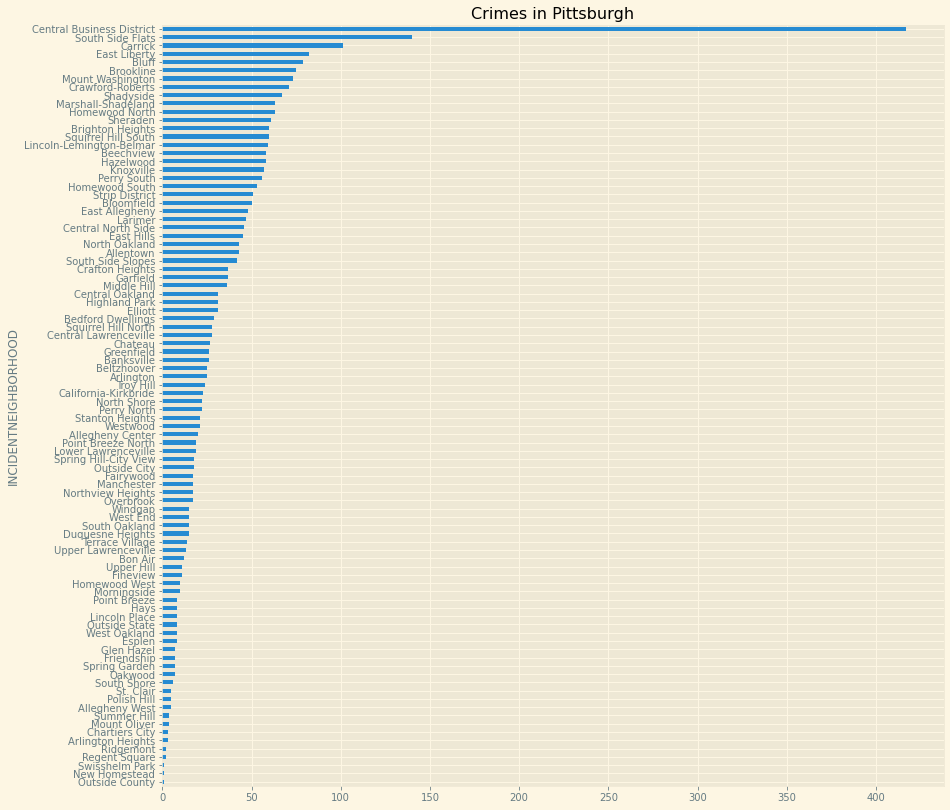

In [28]:
plt.style.use('Solarize_Light2')
crimesfinal.plot.barh(title = 'Crimes in Pittsburgh', x= 'IncidentNeighborhood', y='Number of Crimes', figsize=(14,14)).invert_yaxis()

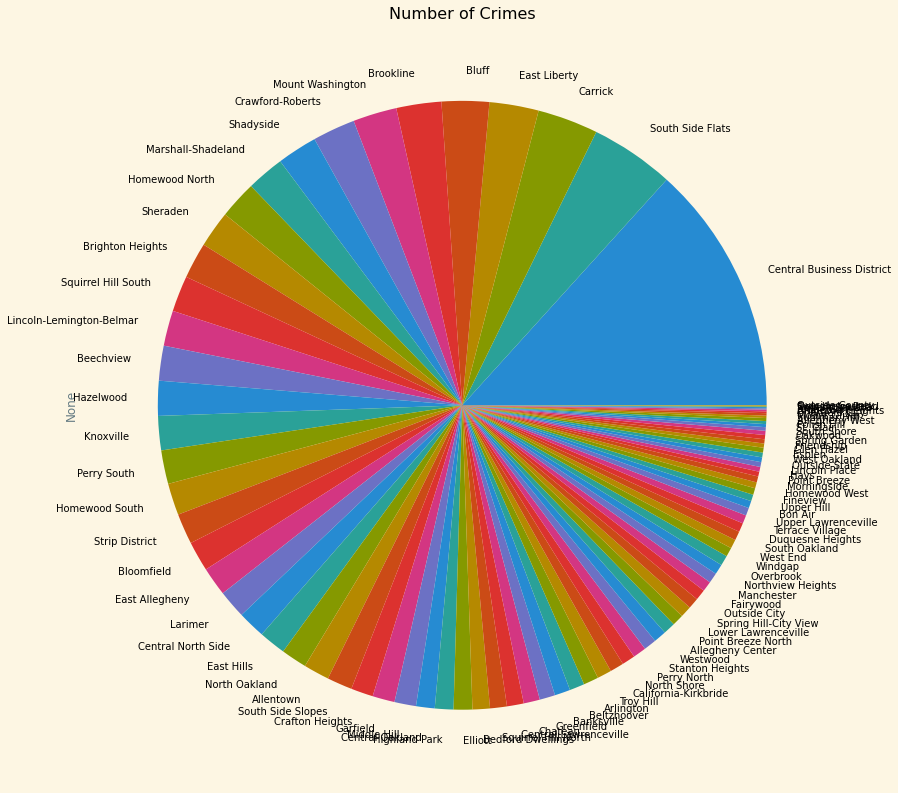

In [29]:
plt.style.use('Solarize_Light2')
crimesfinal.plot.pie(figsize = (14,14), title = "Number of Crimes")

### Metric Calculation: Get A Final Score For Each Neighborhood

Since a low traffic count indicates a high subscore, and a low crime rate indicates a high score, we should do something to convert the data to represent a fair score appropriately.

To do this, we use a formula!

The formula used to calculate the overall score is as follows: 

**Score = (0.3 * (1 / crime incidents) * 100) + (0.3 * (1 / traffic count) * 100) + (0.4 * crosswalks)**

The formula consists of three components, each with different weights:
1. The reciprocal of crime incidents (1 / crime incidents) represents the safety of the neighborhood, with lower crime rates resulting in higher scores. This component has a weight of 0.3, reflecting its importance in the overall score. 

2. The reciprocal of traffic count (1 / traffic count) represents how pedestrian-friendly the neighborhood is, with lower traffic resulting in higher scores. This component also has a weight of 0.3, indicating its significance in determining walkability. 

3. The number of crosswalks represents the availability of pedestrian infrastructure, with more crosswalks resulting in higher scores. This component has the highest weight of 0.4, emphasizing its role in ensuring pedestrian safety and accessibility.


                 neighborhood       score
0   Central Business District  190.813015
1            South Side Flats  135.060870
2         Squirrel Hill South  125.609836
3                  Bloomfield  106.809745
4                   Shadyside  106.006805
5                East Liberty   88.406439
6               North Oakland   80.005038
7              Strip District   75.603095
8             Central Oakland   75.207960
9         Squirrel Hill North   74.807616
10           Mount Washington   68.005577
11               Point Breeze   66.407682
12                  Brookline   64.407664
13                      Bluff   62.816775
14      Central Lawrenceville   62.413334
15             Homewood South   62.407019
16                North Shore   60.002899
17                    Carrick   59.215232
18                  Beechview   57.621152
19                  Hazelwood   57.223265
20                 Greenfield   57.212573
21                Perry South   56.009938
22              Highland Park   55

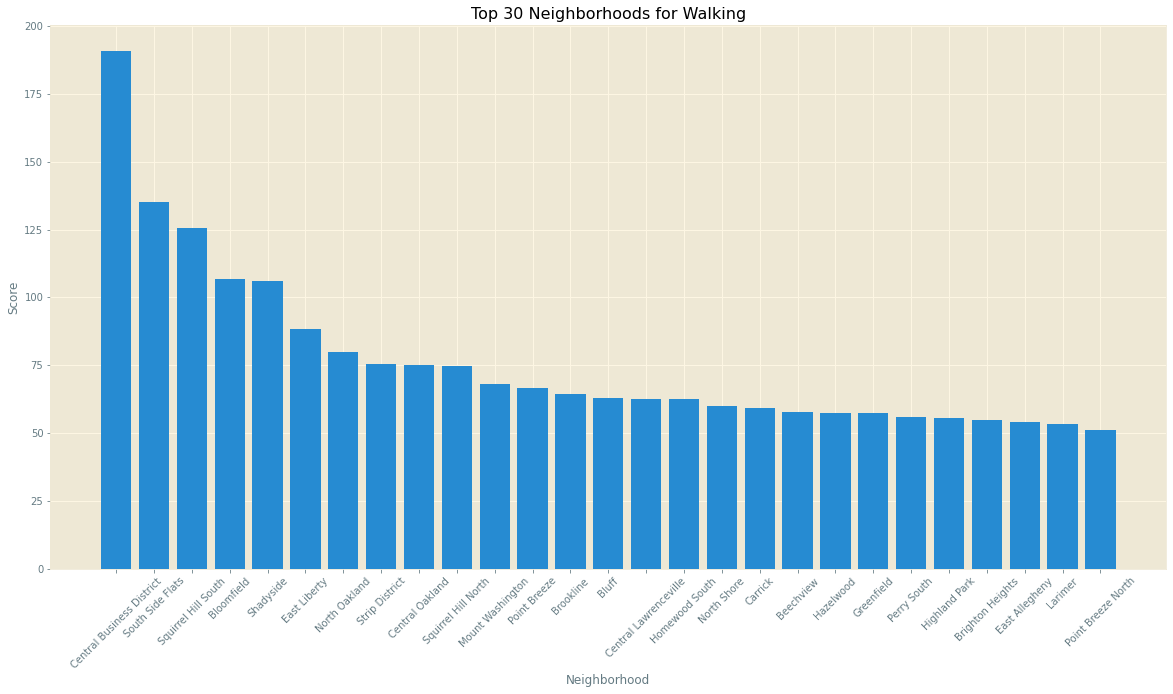

In [49]:
# Merge the three datasets
crosswalks_data = crosswalks.groupby("neighborhood").size().sort_values(ascending=False)
crimes_data = crimesfinal.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending=False)

data_merged = crosswalks_data.reset_index().merge(average_traffic_by_neighborhood, left_on='neighborhood', right_on='Neighborhood').merge(crimes_data.reset_index(), left_on='neighborhood', right_on='INCIDENTNEIGHBORHOOD')

# Calculate the score for each neighborhood
data_merged['score'] = (0.3 * (1 / data_merged[str(0) + '_y']) * 100) + (0.3 * (1 / data_merged['Average Traffic Count']) * 100) + (0.4 * data_merged[str(0) + '_x'])


# Sort the data by score
data_sorted = data_merged.sort_values(by='score', ascending=False)

# Show the top 30 neighborhoods
top_30 = data_sorted.head(30)
print(top_30[['neighborhood', 'score']])

# bar plot
plt.figure(figsize=(20, 10))
plt.bar(top_30['neighborhood'], top_30['score'])
plt.xlabel('Neighborhood')
plt.ylabel('Score')
plt.title('Top 30 Neighborhoods for Walking')
plt.xticks(rotation=45)
plt.show()


Based on the analysis of the three datasets, here are the top 5 neighborhoods for walking, ranked by their calculated score: 
1. Central Business District - 190.81 
2. South Side Flats - 135.06 
3. Squirrel Hill South - 125.61 
4. Bloomfield - 106.81 
5. Shadyside - 106.01 

The best neighborhood to walk in, according to the highest score, is the **Central Business District** with a score of 190.81.

### The Best Neighborhood to Walk in is the Central Business District!